# Character Recognition Using Perceptron Neural Network

### 1. Initializing Project and Reading Data From CSV Files 
**The source code of this particular project implemented in the src/projects/perceptron.py**.

Datasets of this project is in **dataset/perceptron/charachter_recognition**.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from projects import PerceptronNetwork

training_dataset = np.genfromtxt("../dataset/perceptron/character_recognition/training_dataset.csv", delimiter=',', skip_header=1)
test_dataset = np.genfromtxt("../dataset/perceptron/character_recognition/test_dataset.csv", delimiter=',', skip_header=1)

### 2. Train The Network
Here we train our network using PerceptronNetwork's train() function implemented in **perceptron.py** in **src/projects**

In [8]:
perceptron_network = PerceptronNetwork(input_count=25, learning_rate=0.5, threshold=0.2)

iteration_count = 1
while (iteration_count != 100):
    
    for vector in training_dataset:
        perceptron_network.train(x=vector[:25], bias=vector[25], target=vector[26])
    
    iteration_count += 1

### 3. Testing The Network and Plotting The Accuracy Chart
Here we plot a bar chart to indicate our accuaracy ratio, by counting number of cases which successfully produces the desired target value.

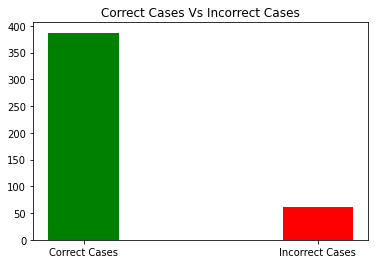

'Success Rate: 86.192 %'

In [7]:
correct_cases = 0
for test_vector in test_dataset:
    net_input = perceptron_network.calculate_net_input(test_vector[:25])
    result = perceptron_network.activation_function(net_input)
    if result == test_vector[25]:
        correct_cases += 1
incorrect_cases = test_dataset.shape[0] - correct_cases

labels = ['Correct Cases', 'Incorrect Cases']
data = [correct_cases, incorrect_cases]

plt.bar(labels, data, color=('green', 'red'), width=0.3)
plt.title('Correct Cases Vs Incorrect Cases')
plt.show()

success_percentage = round((correct_cases / test_dataset.shape[0]) * 100, 3)
f"Success Rate: {success_percentage} %"